In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math


In [4]:
'''
function returns kro,krw,S for given parameters
'''

def rel_perm(Sw, Swr, Sor, kro0, krw0, nw, no):
    S = (Sw - Swr)/(1 - Swr - Sor)
    krw = krw0 * S**(nw)
    kro = kro0 * (1-S)**(no)
   
    return kro, krw,S


In [5]:
'''
returns plot that shows rel perm curves
'''
def rel_perm_plots():
    Swr, Sor, kro0, krw0, nw, no = 0.16,0.24,1,0.22,2.7,2.2
    krw_lst = []
    kro_lst = []
    Sw_lst = np.arange(Swr, 1-Sor, 0.001).tolist()
    for Sw in Sw_lst:
        kro, krw,S = rel_perm(Sw,Swr, Sor, kro0, krw0, nw, no)
        krw_lst.append(krw)
        kro_lst.append(kro)
    plt.plot(Sw_lst, kro_lst, label="Oil")
    plt.plot(Sw_lst, krw_lst, label="Water")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend()
    plt.title("Relative Permeability vs. Water Saturation")
    plt.xlabel("Water Saturation (Sw)")
    plt.ylabel("Relative Permeability")
    plt.grid()
    plt.show()


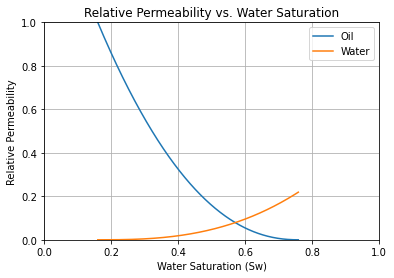

In [6]:
rel_perm_plots()

In [56]:
"""
fucntion that returns fw for a given set of parameters
"""

def frac_flow(Sw,visc_water,visc_oil,velocity, k, p_water, p_oil, alpha ):  
    Swr, Sor, kro0, krw0, nw, no = 0.16,0.24,1,0.22,2.7,2.2
    kro,krw,S = rel_perm(Sw, Swr, Sor, kro0, krw0, nw, no)
    Ng = (k *kro * ((p_water - p_oil)/(144*velocity*visc_oil)))*6.33e-3
    M = (krw/visc_water)/(kro/visc_oil)
    fw = (1-(Ng*np.sin(alpha* np.pi/180)))/(1+(1/M))
    kro,krw,S2 = rel_perm(Sw+1e-6, Swr, Sor, kro0, krw0, nw, no)
    Ng = (k *kro * ((p_water - p_oil)/(144*velocity*visc_oil)))*6.33e-3
    M = (krw/visc_water)/(kro/visc_oil)
    fw2 = (1-(Ng*np.sin(alpha* np.pi/180)))/(1+(1/M))
    dfw = (fw2 - fw)/(1e-6)
    return fw, dfw

In [69]:
"""
Function returns plots that compare different oil viscositys
"""

def frac_flow_plot():  
    Swr, Sor, kro0, krw0, nw, no,alpha, velocity,k,visc_water,p_water,p_oil = 0.16,0.24,1,0.22,2.7,2.2,0,0.01,400,1,62.4,40.56
    fw_counter = 0
    viscs_oil = [0.5,5,50]
    labels1 = []
    labels2 = []
    plot1 = []
    plot2 = []

    for visc_oil in viscs_oil:
        fw_values = []
        dfw_values = []
        Sw_lst = np.arange(Swr, 1-Sor, 0.001).tolist()
        Sw_lst.pop(0)
    
        for Sw in Sw_lst:
            if Sw != Swr:
                fw,dfw = frac_flow(Sw,visc_water,visc_oil,velocity, k, p_water, p_oil, alpha)
                fw_values.append(fw)
                dfw_values.append(dfw)
            
        label =(" E.P Mobility Ratio = "+ str(krw0*visc_oil/(kro0*visc_water)) )
        label2 = ("dfw at oil viscocity = " + str(viscs_oil[fw_counter]))
        plot1.append(fw_values)
        plot2.append(dfw_values)
        labels1.append(label)
        labels2.append(label2)
        fw_counter += 1
    counter = 0
    for plot in plot1:
        plt.plot(Sw_lst,plot, label = labels1[counter])
        counter +=1
    plt.legend()
    plt.title("Fractional Flow vs. Water Saturation")
    plt.xlabel("Water Saturation (Sw)")
    plt.ylabel("Fractional Flow (fw)")
    plt.grid()
    plt.show()
    counter = 0
    for plot in plot2:
        plt.plot(Sw_lst,plot, label = labels2[counter])
        counter +=1
    plt.legend()
    plt.title("Derivative vs. Water Saturation")
    plt.xlabel("Water Saturation (Sw)")
    plt.ylabel("Derivative of Fractional Flow (dfw)")
    plt.grid()
    plt.show()


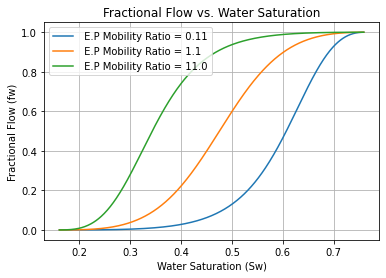

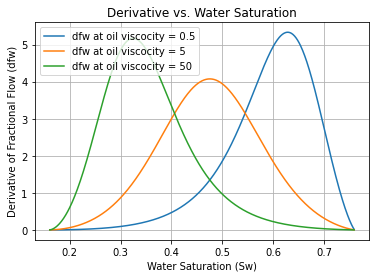

In [70]:
frac_flow_plot()

In [67]:
"""
function returns plots that compare different dip angles
"""

def frac_flow_plot_dips():  #function that generates values for a the range of Sw values
    Swr, Sor, kro0, krw0, nw, no,alpha, velocity,k,visc_water,p_water,p_oil = 0.16,0.24,1,0.22,2.7,2.2,0,0.01,400,1,62.4,40.56
    visc_oil = 5
    fw_counter = 0
    dips = [-30,0,30]
    labels = []
    labels2 = []
    plot1 = []
    plot2 = []

    for dip in dips:
        fw_values = []
        dfw_values = []
        Sw_lst = np.arange(Swr, 1-Sor, 0.001).tolist()
        Sw_lst.pop(0)
    
        for Sw in Sw_lst:
            fw,dfw = frac_flow(Sw,visc_water,visc_oil,velocity, k, p_water, p_oil, dip)
            fw_values.append(fw)
            dfw_values.append(dfw)
            
        label =("alpha = "+ str(dips[fw_counter]) )
        label2 = ("Ng0sin(alpha)= " + str(math.trunc(np.sin(dip* np.pi/180)*(k *kro0 * ((p_water - p_oil)/(144*velocity*visc_oil)))*6.33e-3)))

        plot1.append(fw_values)
        plot2.append(dfw_values)
        labels.append(label)
        labels2.append(label2)
        fw_counter += 1
    counter = 0
    for plot in plot1:
        plt.plot(Sw_lst,plot, label = labels2[counter])
        counter +=1
    plt.legend()
    plt.title("Fractional Flow vs. Water Saturation")
    plt.xlabel("Water Saturation (Sw)")
    plt.ylabel("Fractional Flow (fw)")
    plt.grid()
    fw_counter += 1
    plt.show()  
    counter = 0
    for plot in plot2:
        plt.plot(Sw_lst,plot, label = labels[counter]) 
        counter +=1   
    plt.legend()
    plt.title("Derivative vs. Water Saturation")
    plt.xlabel("Water Saturation (Sw)")
    plt.ylabel("Derivative of Fractional Flow (dfw)")
    plt.grid()
    plt.show()


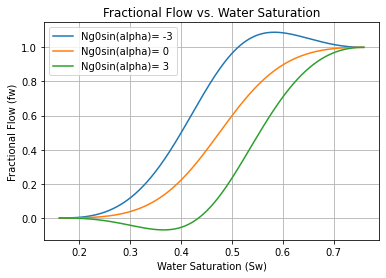

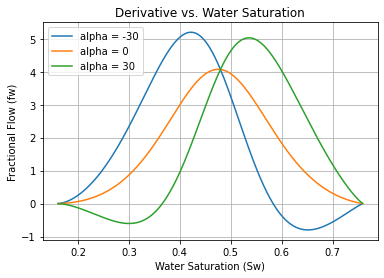

In [68]:
frac_flow_plot_dips()